In [1]:
import pandas as pd
from oct_Utils import *
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
file_path='/home/octusr3/project/oct/temp/data.csv'
data=pd.read_csv(file_path)


/home/octusr3/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:

df_num = pd.read_csv(f'/home/octusr3/project/oct/temp/df4R_num_pdp.csv')
df_pred = pd.read_csv(f'/home/octusr3/project/oct/temp/df4R_pred_pdp.csv')

In [3]:
class_mapping = {
    0: 1,
    0.005: 1,
    0.01: 1,
    0.02: 1,
    0.05: 1,
    0.95: 0,
    0.98: 0,
    0.99: 0,
    0.995: 0,
    1: 0,
}
valid_cols = [f'l{i}' for i in range(1, 55)]
valid_cols.remove('l26')
valid_cols.remove('l35')
for col in valid_cols:
    df_num[col] = df_num[col].map(class_mapping)#计算分类错误点数
    df_pred[col] = df_pred[col].map(class_mapping)

In [4]:
bupt=pd.DataFrame()
temp={
    True:1,
    False:0
}
for col in valid_cols:#用来计算分类错误的点
    bupt[col]=df_num[col]!=df_pred[col]
    bupt[col]=bupt[col].map(temp)
bupt['Row_sum'] = bupt.apply(lambda x: x.sum(),axis=1)
data['Row_mistake_sum']=bupt['Row_sum']
test_data=data.sort_values(by='Row_mistake_sum',ascending=False).iloc[0:30]#

In [5]:
def fill_array(input:str):#现在用的都是正正常常的数据，经过重新组织过的数据，序列是对的上的
    position_list=[(1, 3), (1, 4), (1, 5), (1, 6), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (3, 1), (3, 2),
     (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7),
    (4, 8), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (6, 1), (6, 2), (6, 3), (6, 4), 
    (6, 5), (6, 6), (6, 7), (6, 8), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (8, 3), (8, 4), (8, 5), (8, 6)]
    temp_data=str_to_np_array(input)
    res=np.zeros((10,10))
    for i,j in zip(temp_data,position_list):
        res[j[0]][j[1]]=int(i)
    return str(res)
test_data['pred']=test_data['pred'].apply(fill_array)

In [6]:
def construct_two_class_mat(data):
    position_list=[(1, 3), (1, 4), (1, 5), (1, 6), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (3, 1), (3, 2),
     (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7),
    (4, 8), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (6, 1), (6, 2), (6, 3), (6, 4), 
    (6, 5), (6, 6), (6, 7), (6, 8), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (8, 3), (8, 4), (8, 5), (8, 6)]
    temp_data=[f'l{i}' for i in range(1, 55)]
    res=np.zeros((10,10))
    for i,j in zip(temp_data,position_list):
        res[j[0]][j[1]]=data[i]
    return str(res)

In [28]:
df_pred.to_csv('mse')

In [23]:
test_data=test_data.join(df_num[[f'l{i}' for i in range(1, 55)]])#对数据join,增加分类结果
test_data['classification_num']=test_data.apply(construct_two_class_mat,axis=1)
test_data=test_data.drop([f'l{i}' for i in range(1, 55)],axis=1)
test_data=test_data.join(df_pred[[f'l{i}' for i in range(1, 55)]])
test_data['classification_pred']=test_data.apply(construct_two_class_mat,axis=1)
#

/home/octusr3/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/octusr3/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/octusr3/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/octusr3/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/octusr3/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning

matplotlib.axes._subplots.AxesSubplot

/home/octusr3/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/octusr3/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/octusr3/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/octusr3/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/octusr3/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning

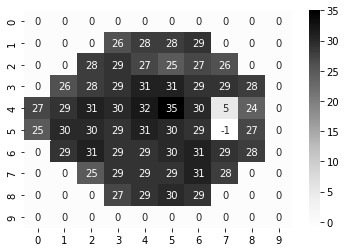

In [ ]:
type(sns.heatmap(df,cmap="Greys",annot=True))